# <font color = green> PROCESSAMENTO DE IMAGENS BIOMÉDICAS </font>

In [70]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
from pydicom.data.data_manager import get_files
import glob
import cv2

## <font color = green> TESTANDO A LIB PYDICOM </font>

In [ ]:
# Para abrir apenas uma imagem DICOM, podemos utilizar o get_files 
path = "CINTILOGRAFIAS/BMT/P1A"
dicom = "D405923.dcm"
filename = get_files(path, dicom)[0]

In [ ]:
# Le e retorna um dataset
ds = pydicom.dcmread(filename)

In [ ]:
ds.PatientName

In [80]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Nuclear Medicine Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.280.2.1.21082021074514281.44798919
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.114080.1.0.2
(0002, 0013) Implementation Version Name         SH: 'DCM_V2'
(0002, 0016) Source Application Entity Title     AE: 'gdcmanon'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 634
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'STATIC', 'EMISSION']
(0008, 0016) SOP Class UID                       UI: Nuclear Medicine Image Storage
(000

In [ ]:
# Para verificarmos  a matriz da imagem utilizamos o pixel_array
ds.pixel_array

## <font color = green> ABERTURA DAS IMAGENS </font>

### Salvando a matriz das imagens em duas listas que representam as classes 

In [57]:
bmt = []
graves = []

paths = glob.glob("CINTILOGRAFIAS/BMT/P*A/*.dcm")
for path in paths:
    dataset = pydicom.dcmread(path)
    bmt.append(dataset.pixel_array)
    
paths = glob.glob("CINTILOGRAFIAS/GRAVES/P*A/*.dcm")
for path in paths:
    dataset = pydicom.dcmread(path)
    graves.append(dataset.pixel_array)

### Visualizacao

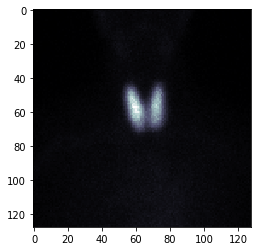

In [81]:
plt.imshow(graves[0], cmap=plt.cm.bone) 

### Salvando a imagem em JPG

In [97]:
plt.imsave('bmt06.png', bmt[6])

IndexError: list index out of range

## <font color = green> PRÉ-PROCESSAMENTO </font>

### Segmentacao da regiao de interesse

In [170]:
image = graves[5]

altura, largura = int(image.shape[1] / 2), int(image.shape[0] / 2)

inicio = int(altura/2)
fim = int(image.shape[0] - inicio)

cropped_image = image[inicio:fim, inicio:fim]

In [163]:
x, y

(0.0, 0.0)

In [164]:
image.shape

(128, 128)

In [165]:
altura, largura

(64.0, 64.0)

In [166]:
centro_x, centro_y

(64.0, 64.0)

In [144]:
cropped_image

### Threshold

In [175]:
thresh = cv2.threshold(graves[5], 40, 255, cv2.THRESH_BINARY)[1]

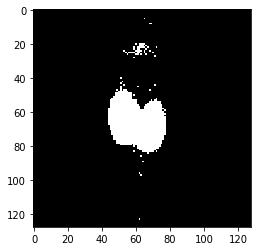

In [177]:
plt.imshow(thresh, cmap=plt.cm.bone) 

In [179]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


### Reducao de ruido

In [100]:
image = cv2.GaussianBlur(bmt[2], (5,5), 0)

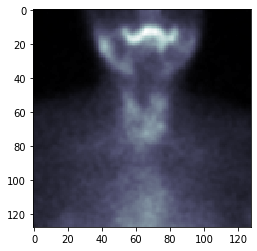

In [101]:
plt.imshow(image, cmap=plt.cm.bone) 

### Convertendo para HSV

In [180]:
hsv_image = cv2.cvtColor(graves[5], cv2.COLOR_BGR2HSV)

error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'
